### Introduction to Kmeans  and its implementation

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Kmeans is a common way of clustering, and it's widely used because of its simplicity. After choosing k centroids, kmeans divides all the data into k parts, with each part having a unique label. Kmeans try to split make the data in one cluster as similar as possible, and split the centroids as far as possible. It usually use Euclidean distance to calculate the distance of different observations. 

There are several steps to follow in order to implement kmeans:
1.  choose k initial centroids.
2. For each observation in the dataset, choose its nearest centroids and assign itself to the cluster.
3. For each cluster, compute the new centroids of the cluster.
(These approach is also called Expectation-Maximization)
4. repeat step 2 and 3 till the distance of the old centroids are no less than the new centroids. 


Just to bear in mind, in the first step, we can either choose initial centroids by randomly pick k data points in the training set, or we can use "kmeans++" methods to choose centroid. The second method take more time to compute but take less iteration to converge. Overall, using kmeans++ is more efficient.


Kmeans++ takes several steps:
1. Initially randomly choose one centroid.
2. For each data points, choose its nearest centroids and compute its distance. For all the distance, choose the largest distance and assign data point to be the next centroids.
3. Repeat the step 2 till all k centroids are selected. 



In [3]:
grey = np.array(Image.open('north-africa-1940s-grey.png'))
grey = grey.reshape(-1).reshape(-1, 1).astype(float)

In [54]:
def kmeans(X:np.ndarray, k:int, centroids=None, tolerance=1e-2):
    if centroids == 'kmeans++':
        centroid = np.zeros(shape=(k,X.shape[1]))
        initial_centroid = X[np.random.randint(X.shape[0])]
        centroid[0] = initial_centroid
        for i in range(1, k):            
            distance_list = [((X - centroid[index])**2).sum(axis=1).reshape(-1,1) for index in range(i)]
            distance_array = np.concatenate(distance_list, axis=1)
            temp = np.argmin(distance_array, axis =1)
            index_dict = {distance_array[i][j]:i for i,j in enumerate(temp)}
            max_index = index_dict[max(index_dict.keys())]
            centroid[i] = X[max_index]
    else:
        centroid = X[np.random.randint(X.shape[0], size=k)]
    while tolerance:
        cluster_list = [[] for i in range(k)]
        distance_list = [((X - centroid[i])**2).sum(axis=1).reshape(-1, 1) for i in range(len(centroid))]
        distance_array = np.concatenate(distance_list, axis = 1)
        temp = list(np.argmin(distance_array, axis =1))
        for i, j in enumerate(temp):
            cluster_list[j].append(i)            
        for i in range(len(cluster_list)):
            if len(cluster_list[i]) == 0: 
                cluster_list[i].append(np.random.randint(X.shape[0]))
        centroid_new = np.array([sum(X[cluster])/len(X[cluster]) for cluster in cluster_list])
        if ((centroid_new - centroid)**2).sum()/len(centroid_new) < tolerance:
            tolerance = False
        centroid = centroid_new 
    return centroid, cluster_list

In [ ]:
def reassign_colors(X, centroid, cluster_list):
    for i in range(len(centroid)):
        X[cluster_list[i]] = centroid[i]
    return X.astype(np.uint8)

In [56]:
def reassign_grey(X, centroid, cluster_list):
    X_ = X.reshape(-1,1).astype(float)
    for i in range(len(centroid)):
        X_[cluster_list[i]] = centroid[i]
    return X_.astype(np.uint8)

Here is one example to implement kmeans. Given a grey picture, let's reduce the color to 4 kinds using k = 4. Here is the result.


Origin picture:

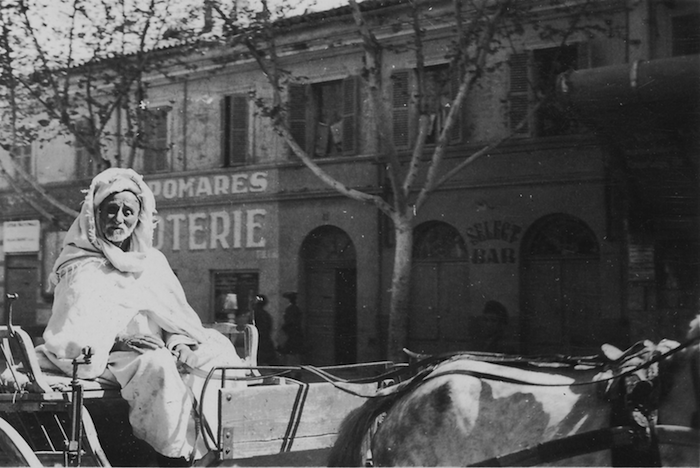

In [75]:
Image.open('north-africa-1940s-grey.png')

In [58]:
centroid, cluster_list = kmeans(grey, 4, centroids='kmeans++')

Picture with 4 color:

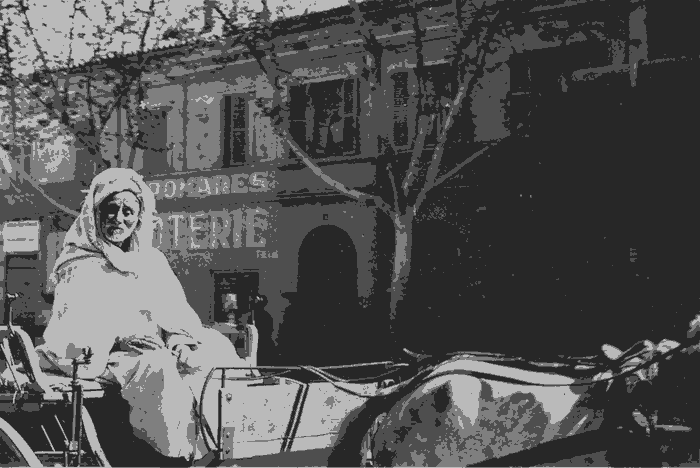

In [59]:
array_after = reassign_grey(grey, centroid, cluster_list).reshape(np.array(Image.open('north-africa-1940s-grey.png')).shape)
Image.fromarray(array_after, 'L')

Kmeans could also be applied in multi-color picture compression. Here is one example. The
compressed version uses only 32 colors:

Original picture:

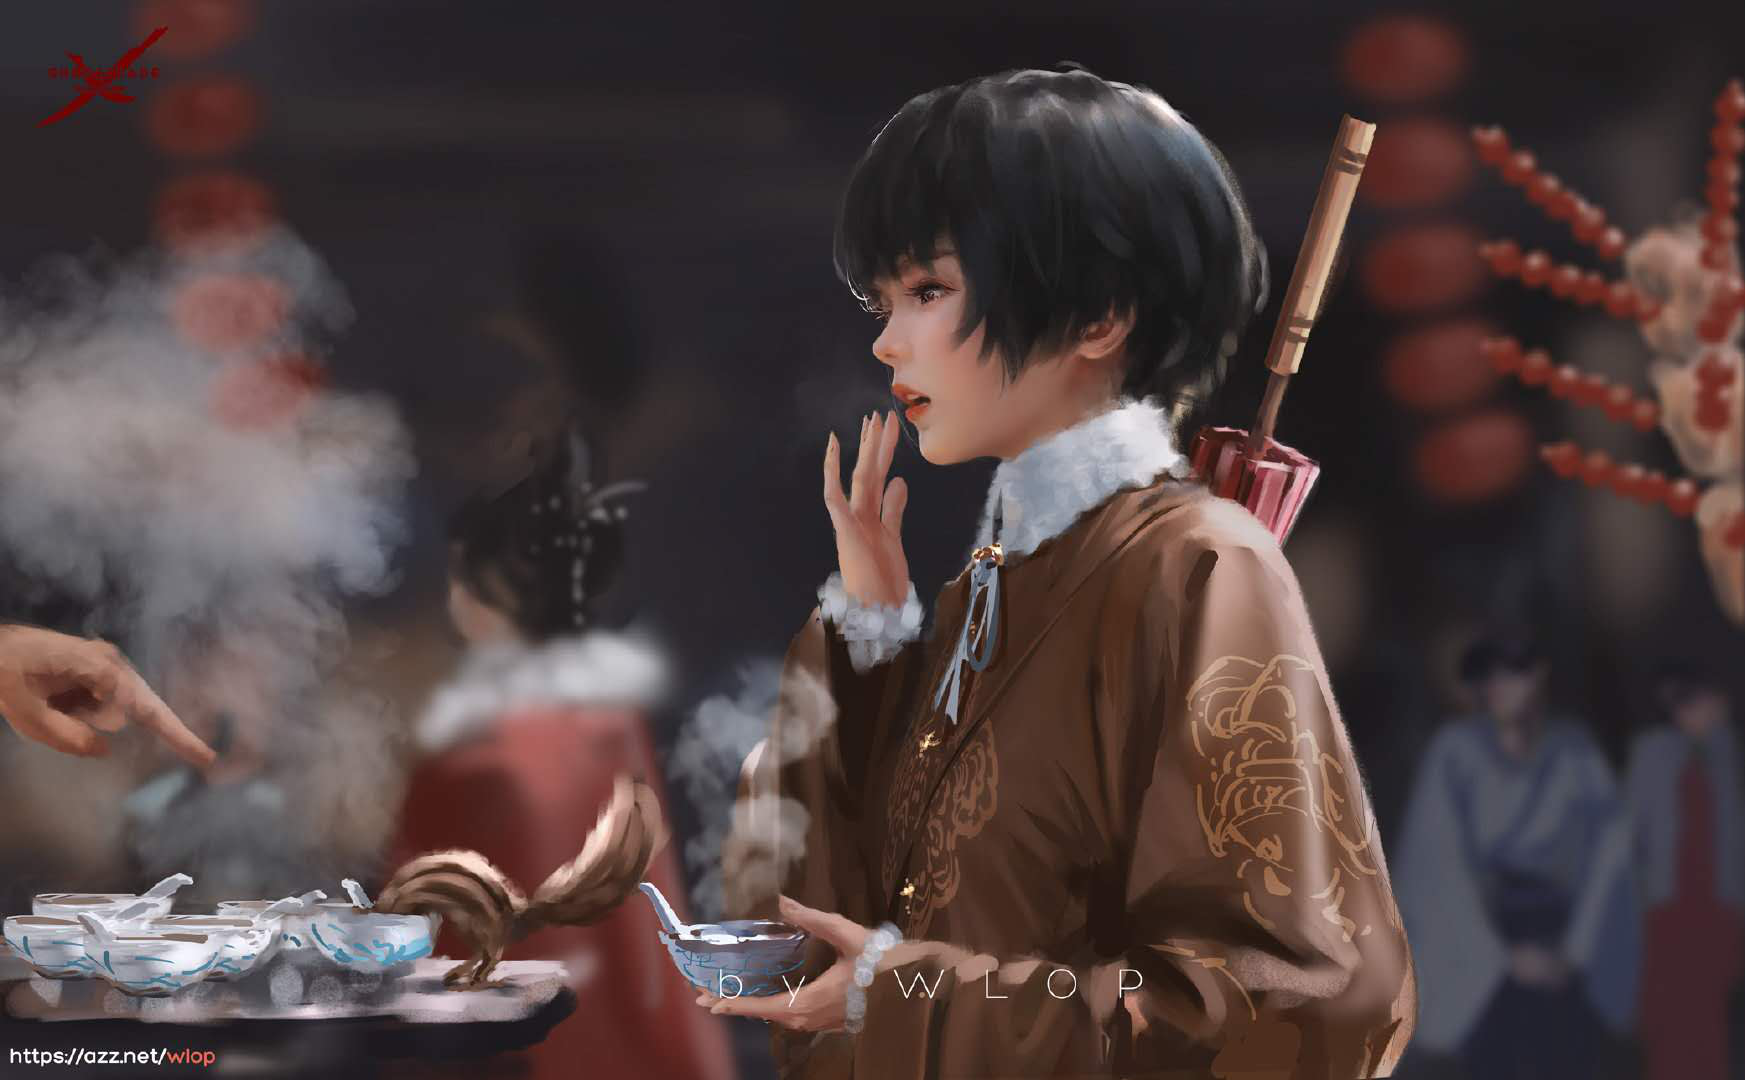

In [83]:
Image.open('WechatIMG851.jpeg')

In [90]:
np.array(Image.open('WechatIMG851.jpeg')).shape

(1080, 1745, 3)

In [84]:
girl = np.array(Image.open('WechatIMG851.jpeg')).astype(int)
girl = parrt.reshape(-1, 3).astype(float)

In [86]:
centroid, cluster_list = kmeans(girl, 32, tolerance = 1, centroids='kmeans++') 

In [87]:
after = reassign_colors(girl, centroid, cluster_list)

Compressed picture with k = 32

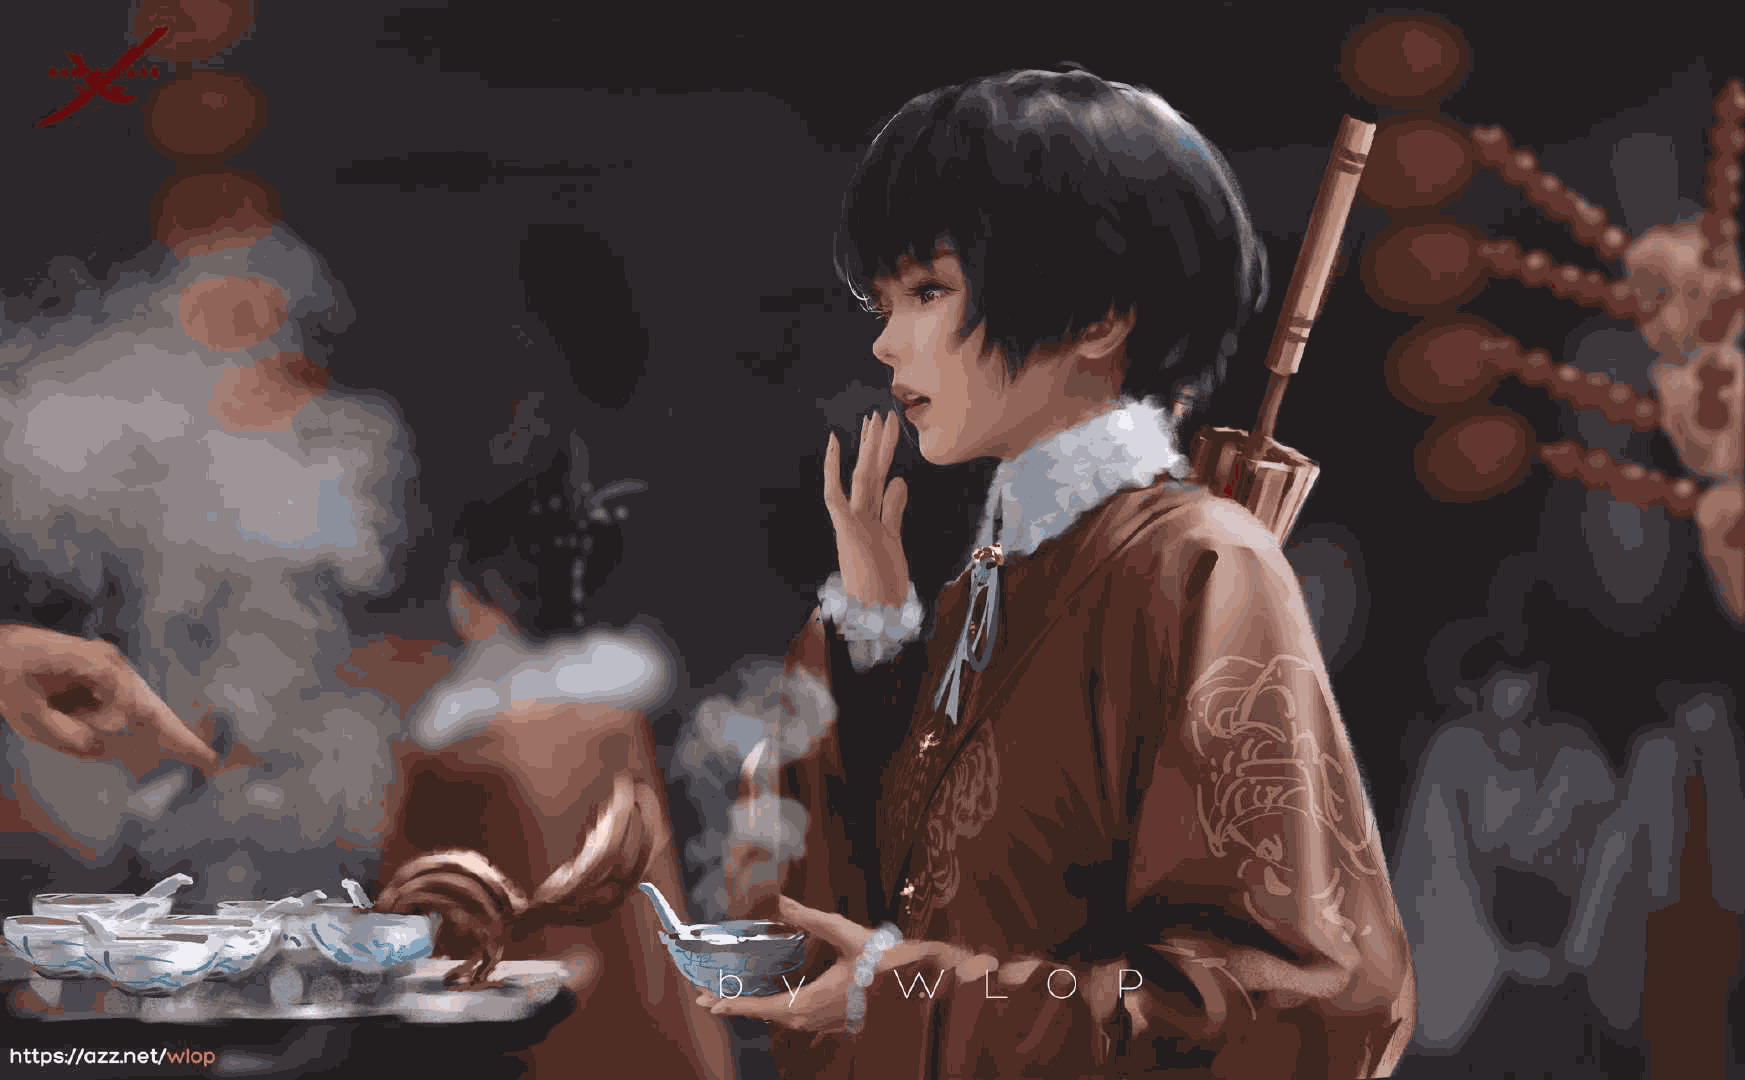

In [88]:
Image.fromarray(after.reshape(np.array(Image.open('WechatIMG851.jpeg')).shape))

Origin picture:

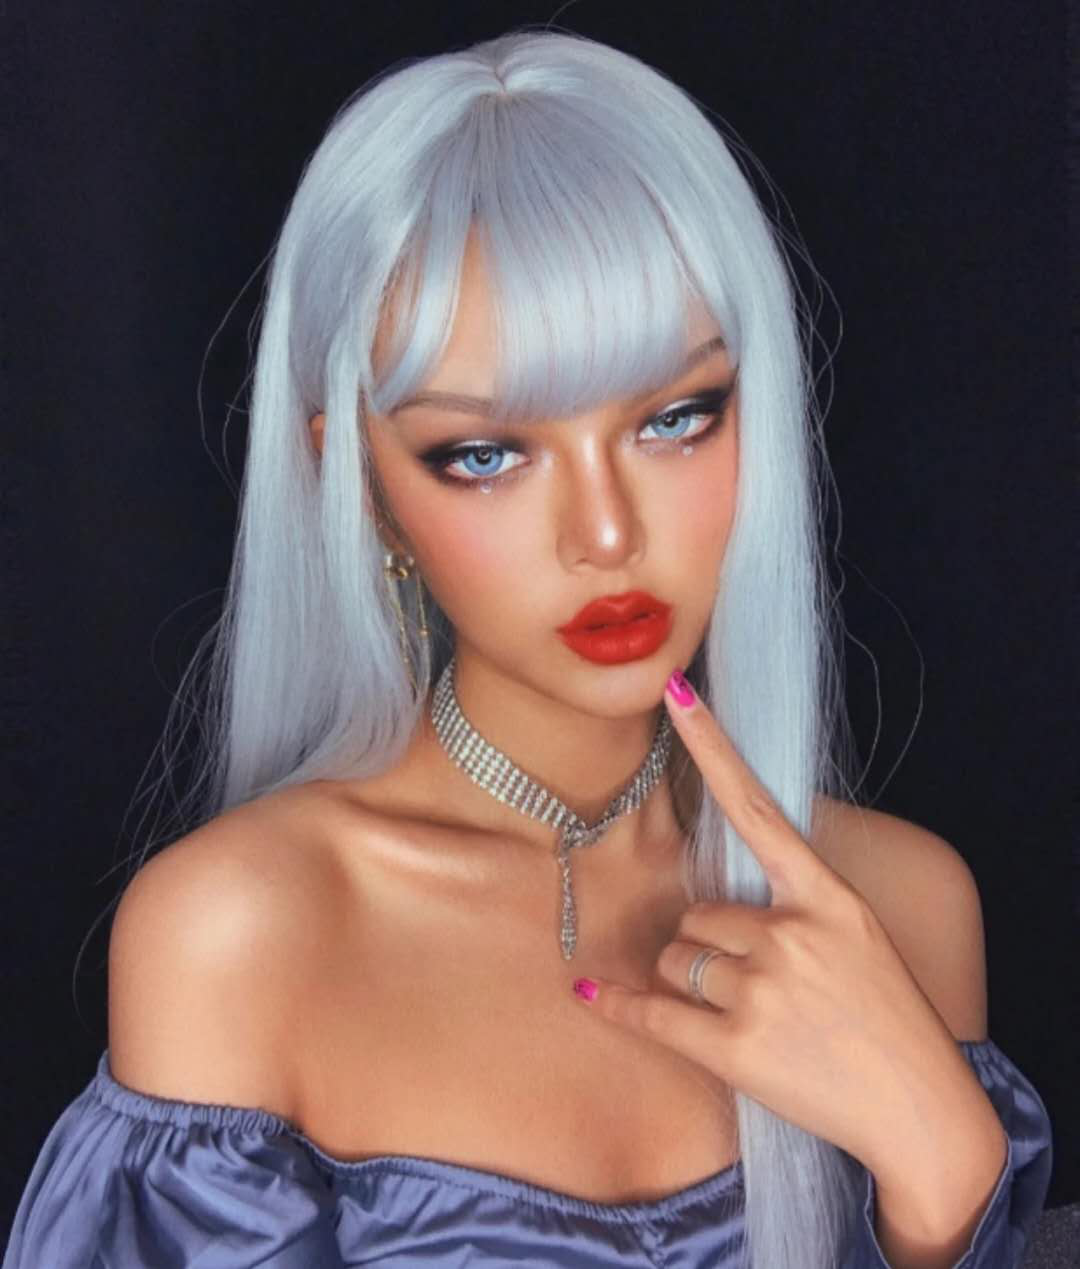

In [77]:
Image.open('WechatIMG847.jpeg')

In [65]:
picture = np.array(Image.open('WechatIMG847.jpeg'))
picture = picture.reshape(-1).reshape(-1, 3).astype(float)

In [79]:
centroid, cluster_list = kmeans(picture, 5, tolerance = 1e-2, centroids='kmeans++') 

Compressed picture with k = 5

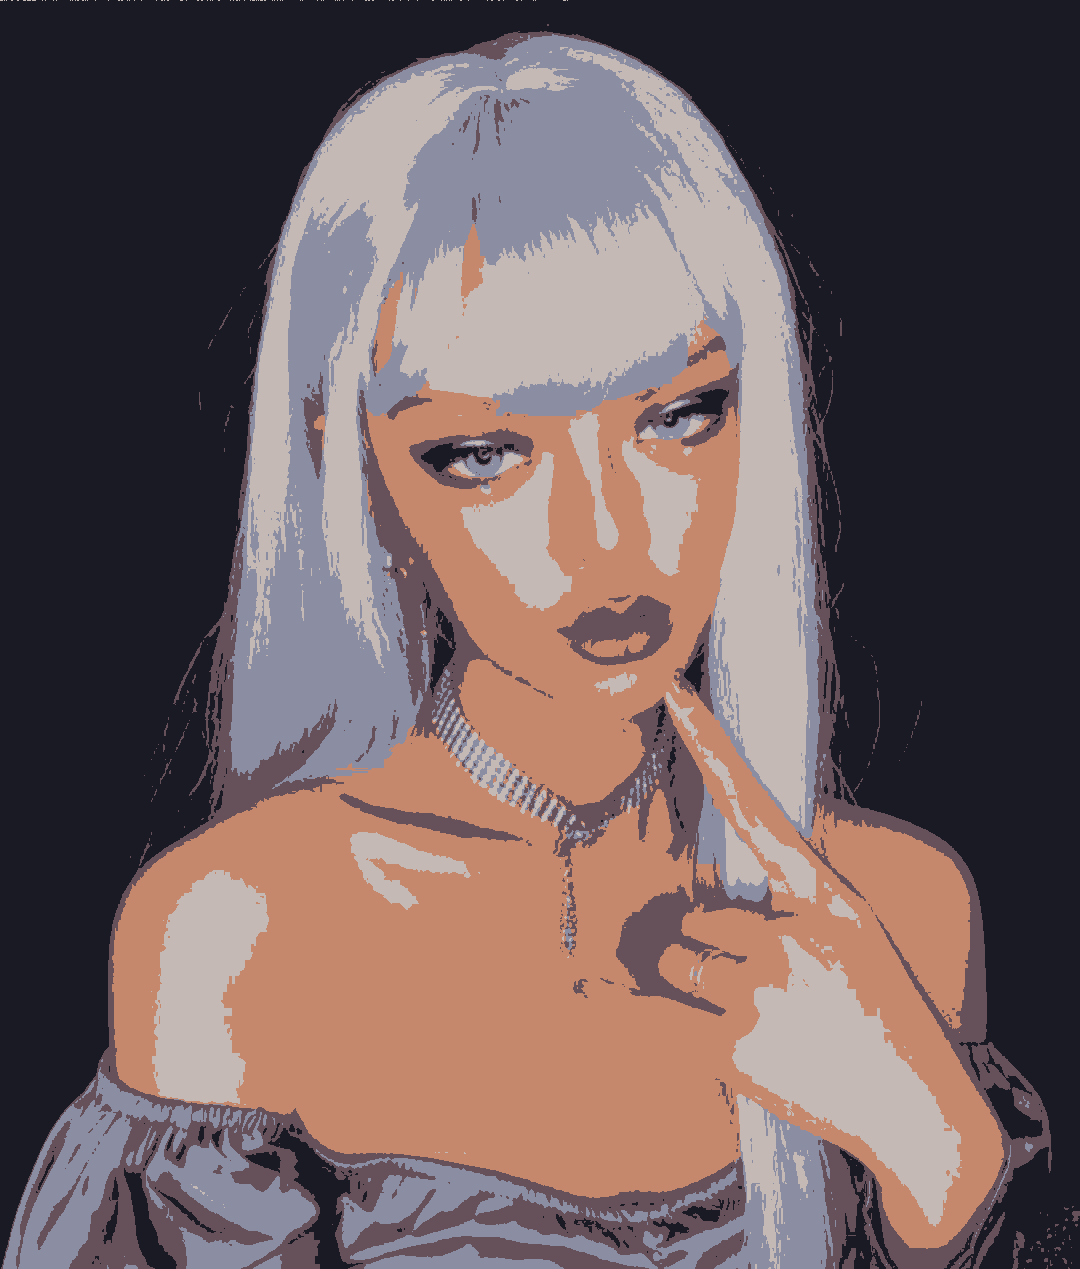

In [80]:
after = reassign_colors(picture, centroid, cluster_list)
Image.fromarray(after.reshape(np.array(Image.open('WechatIMG847.jpeg')).shape))

The kmeans cluster could also use in tabular data. Here is one example. Based on the cancer-related observation, we use k = 2 to cluster the data points to target cluster 0 and 1. Then we measure the kmeans result with the real y value. The result shows that the kmeans does a good job!

In [68]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [69]:
k = 2
centroids, cluster_list = kmeans(X, k=k, centroids='kmeans++', tolerance=0.01)

In [70]:
y_predict = y.copy()
y_predict[cluster_list[0]] = 0
y_predict[cluster_list[0]] = 1

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_predict)

array([[130,  82],
       [  0, 357]])